In [1]:
# Loading all the required libraries
# Numpy and Pandas for data manipulation
import pandas as pd
import numpy as np
# Seaborn and Matplotlib for data visulaization
import seaborn as sns
import matplotlib.pyplot as plt

# Views all rows and columns
pd.set_option('display.max_columns', None)

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing CSV

In [2]:
df = pd.read_excel("all_stream_info_10min.xlsx")

In [3]:
# View top rows
df.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,isShow,cultureGroup,userID,registerTime,registerCountry,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,109414598,2020-06-20 18:47:14 UTC,2020-06-21 07:06:36 UTC,44362,normalEnd,117,2020-06-20 21:48:29.745 UTC,0,3447,0,False,NaN,6cd90016-b679-4a7b-8cc6-2c43d4590cca,2015-07-27 07:19:53 UTC,United States,NaN,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,109389398,2020-06-19 09:03:21 UTC,2020-06-19 14:10:28 UTC,18427,normalEnd,355,2020-06-19 10:25:37.51 UTC,0,22479,0,False,NaN,8258d28e-47b9-4ce8-a765-29175b663a1d,2020-03-24 05:23:22 UTC,United States,NaN,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,109336156,2020-06-15 22:41:45 UTC,2020-06-16 04:22:56 UTC,20471,normalEnd,74,2020-06-15 23:13:27.554 UTC,0,773,0,False,NaN,32563571-1708-4c7e-ae9a-95ec13f56fc2,2020-03-24 05:23:22 UTC,United States,NaN,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551,1
3,109400631,2020-06-20 01:10:14 UTC,2020-06-20 05:11:00 UTC,14446,normalEnd,493,2020-06-20 02:27:30.522 UTC,0,28918,0,False,NaN,7311d32a-e572-4a59-855b-bdd711553bd5,2020-03-24 05:23:22 UTC,United States,NaN,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
4,109368378,2020-06-17 21:04:08 UTC,2020-06-18 01:07:18 UTC,14590,normalEnd,70,2020-06-17 22:28:06.574 UTC,0,721,0,False,NaN,033eb47a-557a-4c2d-9ead-61eee57ae184,2020-03-24 05:23:22 UTC,United States,NaN,674,451,189,614,254,173,544953.0,856.84,290.33,1446,17,28961,1


In [4]:
# Check columns name of the data
print('There are', len(df.columns), 'columns:')
for x in df.columns:
    print(x+ ' ', end= ',')

There are 29 columns:
liveStreamID ,beginTime ,endTime ,duration ,closeBy ,maxLiveViewerCount ,maxLiveViewerTime ,privateLiveStream ,receivedLikeCount ,streamerType ,isShow ,cultureGroup ,userID ,registerTime ,registerCountry ,isContracted ,uniqueViewerCount ,ios ,android ,durationGTE5sec ,durationGTE2min ,durationGTE10min ,totalViewerDuration ,avgViewerDuration ,avgStreamJoinDuration ,count ,followIncreaseEstimated ,receivePointEstimated ,Target ,

In [5]:
# Number of Rows and Columns in data
print("Number of columns (features) in the given data is :", df.shape[1])
print("Number of rows (entries) in the given data is :" , df.shape[0])

Number of columns (features) in the given data is : 29
Number of rows (entries) in the given data is : 3148


# Geting insite of the data type, NAs and categorical values

In [6]:
# check data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   liveStreamID             3148 non-null   int64  
 1   beginTime                3148 non-null   object 
 2   endTime                  3148 non-null   object 
 3   duration                 3148 non-null   int64  
 4   closeBy                  3051 non-null   object 
 5   maxLiveViewerCount       3148 non-null   int64  
 6   maxLiveViewerTime        1838 non-null   object 
 7   privateLiveStream        3148 non-null   int64  
 8   receivedLikeCount        3148 non-null   int64  
 9   streamerType             3148 non-null   int64  
 10  isShow                   3148 non-null   bool   
 11  cultureGroup             0 non-null      float64
 12  userID                   1000 non-null   object 
 13  registerTime             3148 non-null   object 
 14  registerCountry         

In [7]:
# Check Missing values
df_null=df.isnull().sum(axis=0).sort_values(ascending= False)/float(len(df))
df_null

cultureGroup               1.000000
isContracted               1.000000
userID                     0.682338
avgStreamJoinDuration      0.463469
avgViewerDuration          0.463469
totalViewerDuration        0.463469
maxLiveViewerTime          0.416137
closeBy                    0.030813
duration                   0.000000
maxLiveViewerCount         0.000000
endTime                    0.000000
privateLiveStream          0.000000
receivedLikeCount          0.000000
beginTime                  0.000000
streamerType               0.000000
isShow                     0.000000
Target                     0.000000
registerCountry            0.000000
registerTime               0.000000
receivePointEstimated      0.000000
uniqueViewerCount          0.000000
ios                        0.000000
android                    0.000000
durationGTE5sec            0.000000
durationGTE2min            0.000000
durationGTE10min           0.000000
count                      0.000000
followIncreaseEstimated    0

In [8]:
# Check whose missing values greater 40 %
df_null[df_null>0.40]

cultureGroup             1.000000
isContracted             1.000000
userID                   0.682338
avgStreamJoinDuration    0.463469
avgViewerDuration        0.463469
totalViewerDuration      0.463469
maxLiveViewerTime        0.416137
dtype: float64

In [9]:
# Check types of registered country and their percent
df["registerCountry"].value_counts()/len(df)*100

United States    100.0
Name: registerCountry, dtype: float64

In [10]:
# Check types of Streamer Type and their percent
df["streamerType"].value_counts()/len(df)*100

0    100.0
Name: streamerType, dtype: float64

# Removing unwanted variables in the data

In [11]:
vars_must_removed= ["liveStreamID","beginTime","endTime","maxLiveViewerTime","registerCountry","cultureGroup","isContracted",
         "registerTime","userID"]

In [12]:
# drop the variables
df.drop(vars_must_removed, axis=1, inplace= True)

In [13]:
# Check the remaining variables
df.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,44362,normalEnd,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,18427,normalEnd,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,20471,normalEnd,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551,1
3,14446,normalEnd,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
4,14590,normalEnd,70,0,721,0,False,674,451,189,614,254,173,544953.0,856.84,290.33,1446,17,28961,1


# Data Prepocessing 

In [14]:
df.closeBy.value_counts()

normalEnd            2673
end by new stream     129
disconnect            127
Incoming call          65
Killed                 21
Freezed                16
Upload failed          13
Crash                   4
Publish failed          2
Keep alive failed       1
Name: closeBy, dtype: int64

In [15]:
categories = []
for filename in df["closeBy"]:
    if filename == 'normalEnd':
        categories.append(1)
    elif filename == 'end by new stream':
         categories.append(2)
    elif filename == 'disconnect':
         categories.append(3)
    elif filename == 'Incoming call':
         categories.append(4)
    elif filename == 'Killed':
         categories.append(5)
    elif filename == 'Freezed':
         categories.append(6)
    elif filename == 'Upload failed':
         categories.append(7)
    elif filename == 'Crash':
         categories.append(8)
    elif filename == 'Publish failed':
         categories.append(9)
    elif filename == 'Keep alive failed':
         categories.append(10)
            
    else:
        categories.append(0)
        

df["closeBy"] = categories

In [16]:
df.closeBy.value_counts()

1     2673
2      129
3      127
0       97
4       65
5       21
6       16
7       13
8        4
9        2
10       1
Name: closeBy, dtype: int64

In [17]:
df.Target.value_counts()

0    2520
1     628
Name: Target, dtype: int64

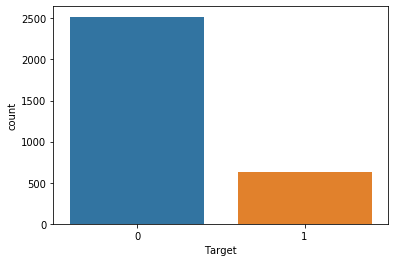

In [18]:
# Check the count of target variable
sns.countplot(x='Target',data=df)

In [19]:
df.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
0,44362,1,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937,1
1,18427,1,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581,1
2,20471,1,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551,1
3,14446,1,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144,1
4,14590,1,70,0,721,0,False,674,451,189,614,254,173,544953.0,856.84,290.33,1446,17,28961,1


# Checking outlies and replacing NAs Value with mode and median

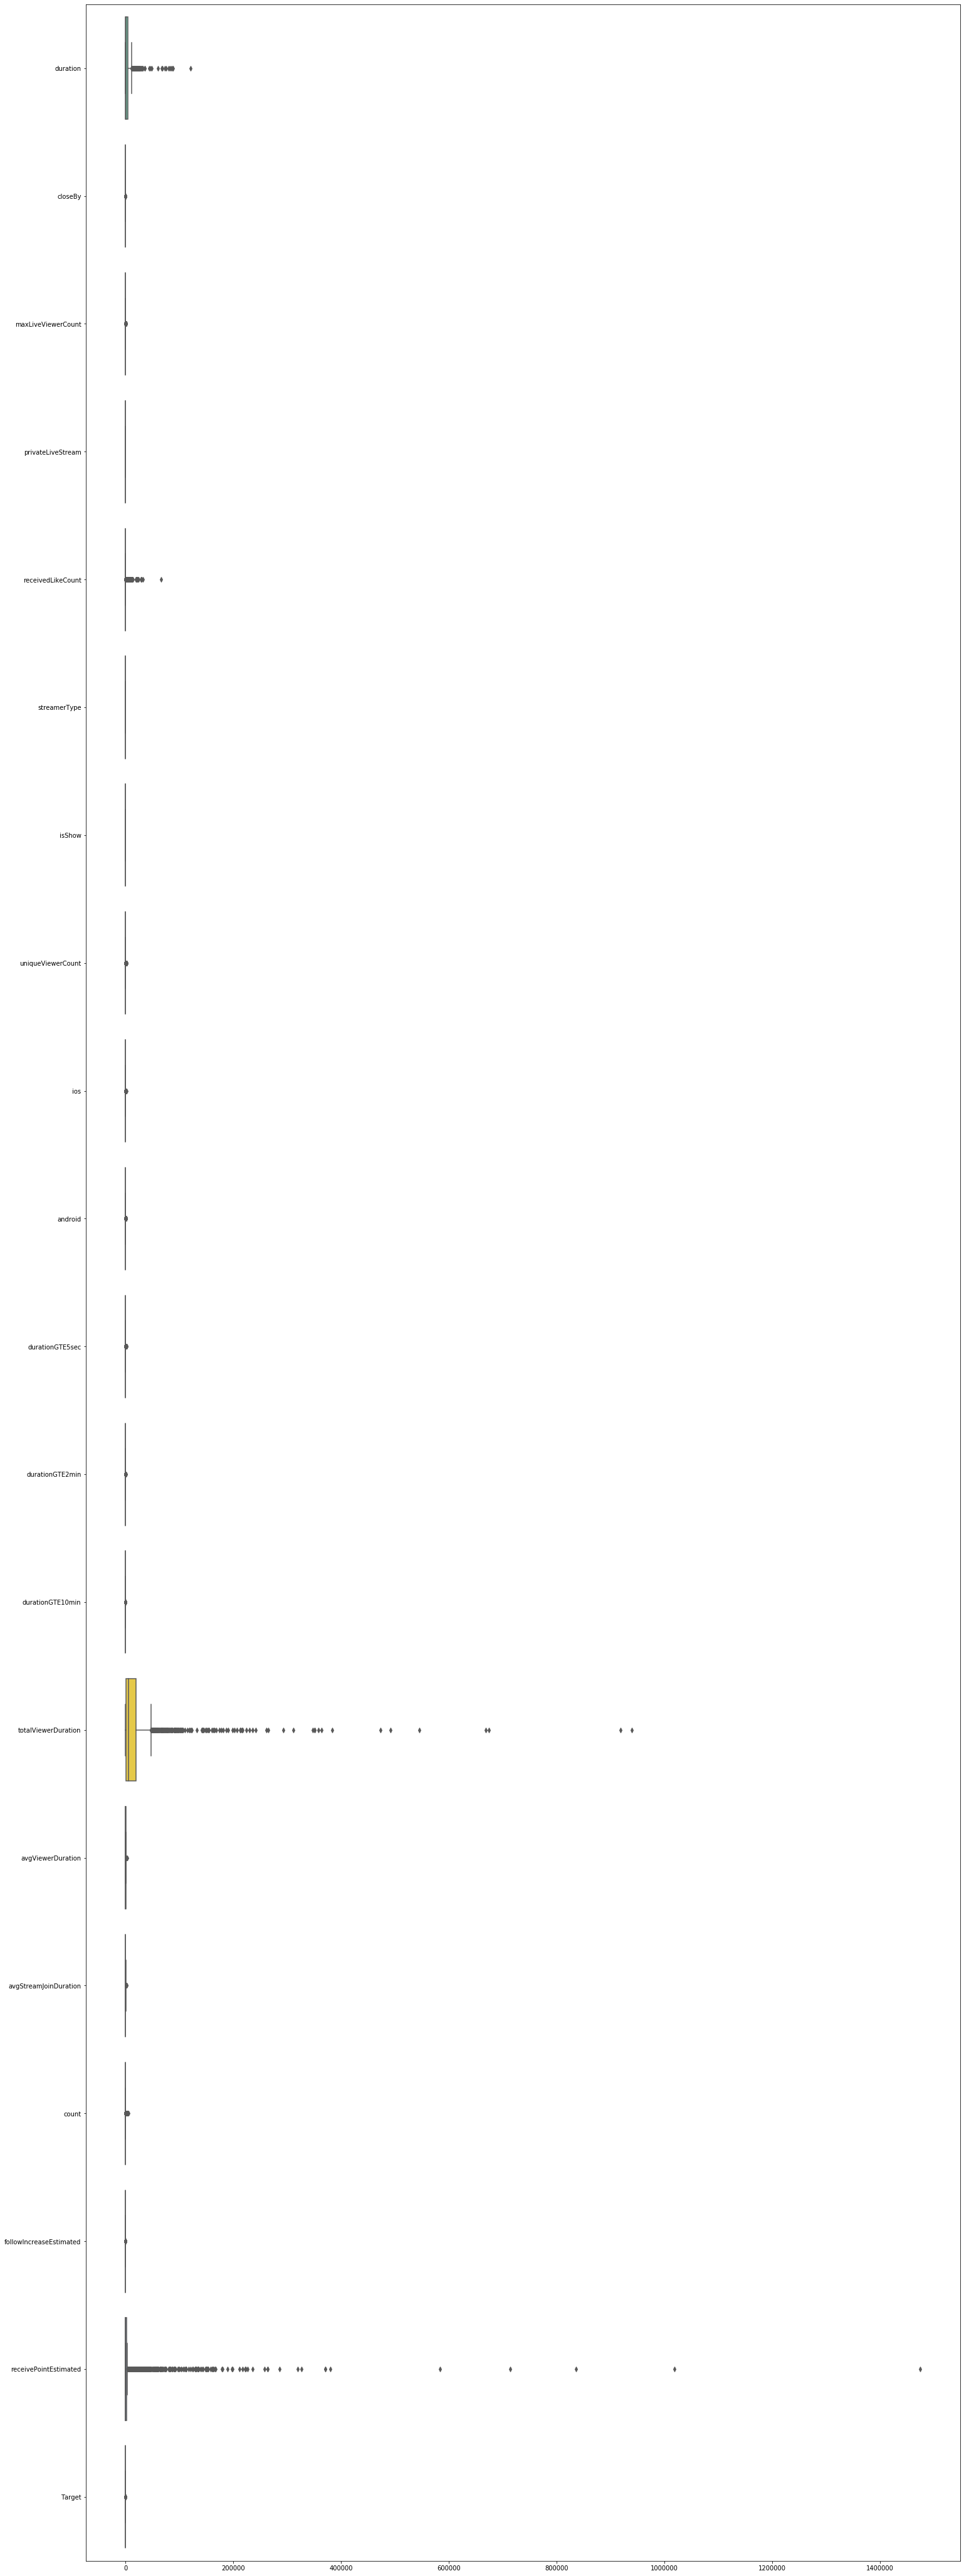

In [20]:
# Check outliers  and distribution of data
plt.figure(figsize=(25,75))
sns.boxplot(data=df, orient="h", palette="Set2")

# Outliers Treatment

In [21]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].median()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

# Missing Values Treatment

In [22]:
def remove_nan_by_median_value(df,col_in):
    x = df[df[col_in] != np.nan][col_in].median()
    df[col_in].replace(np.nan,x,inplace=True)

In [23]:
def remove_nan_by_mode_value(df,col_in):
    x = df[df[col_in] != np.nan][col_in].mode()
    df[col_in].replace(np.nan,x,inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


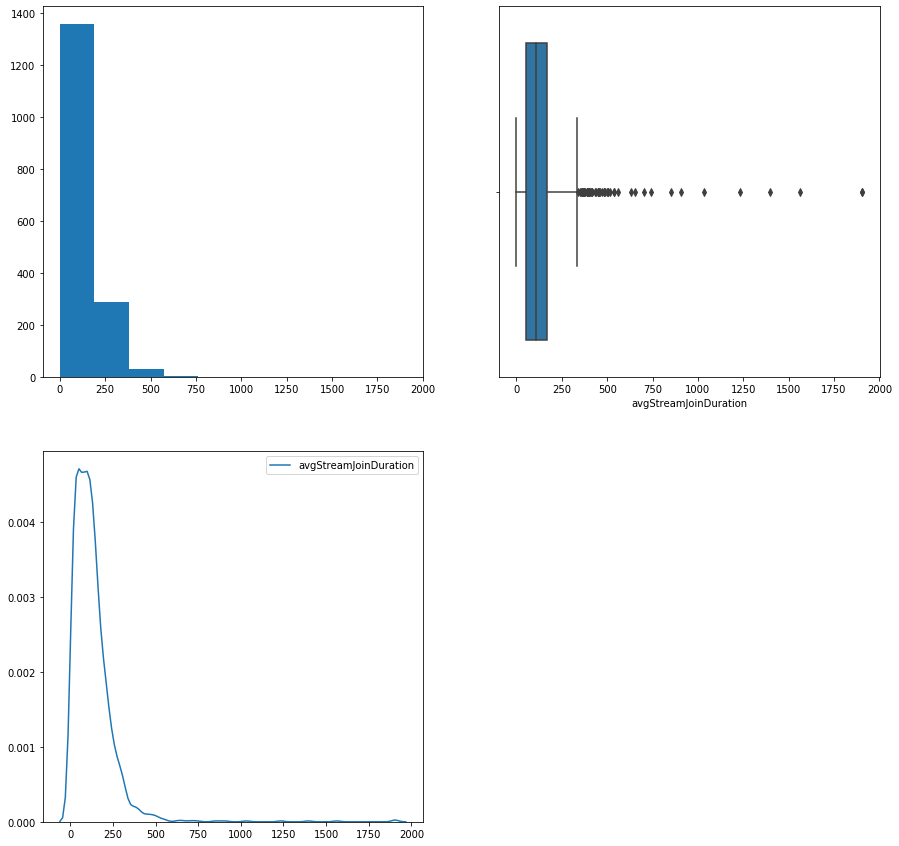

In [24]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['avgStreamJoinDuration'])
plt.subplot(222)
sns.boxplot(df['avgStreamJoinDuration'])
plt.subplot(223)
sns.kdeplot(df['avgStreamJoinDuration'])
remove_nan_by_median_value(df,'avgStreamJoinDuration')

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


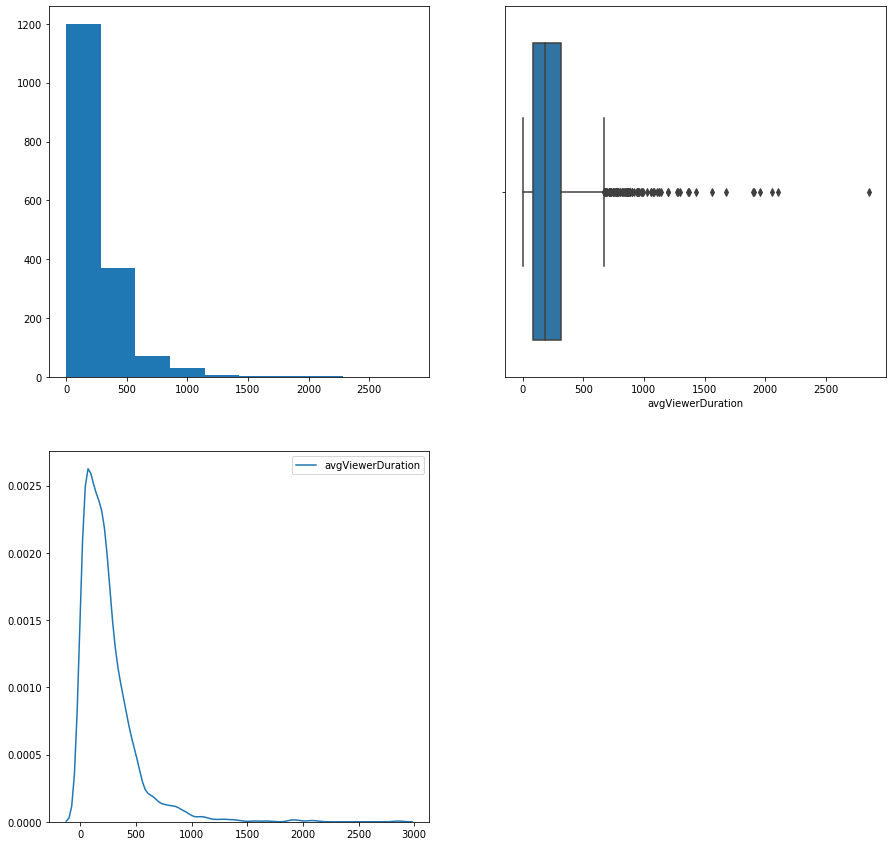

In [25]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['avgViewerDuration'])
plt.subplot(222)
sns.boxplot(df['avgViewerDuration'])
plt.subplot(223)
sns.kdeplot(df['avgViewerDuration'])
remove_nan_by_median_value(df,'avgViewerDuration')

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


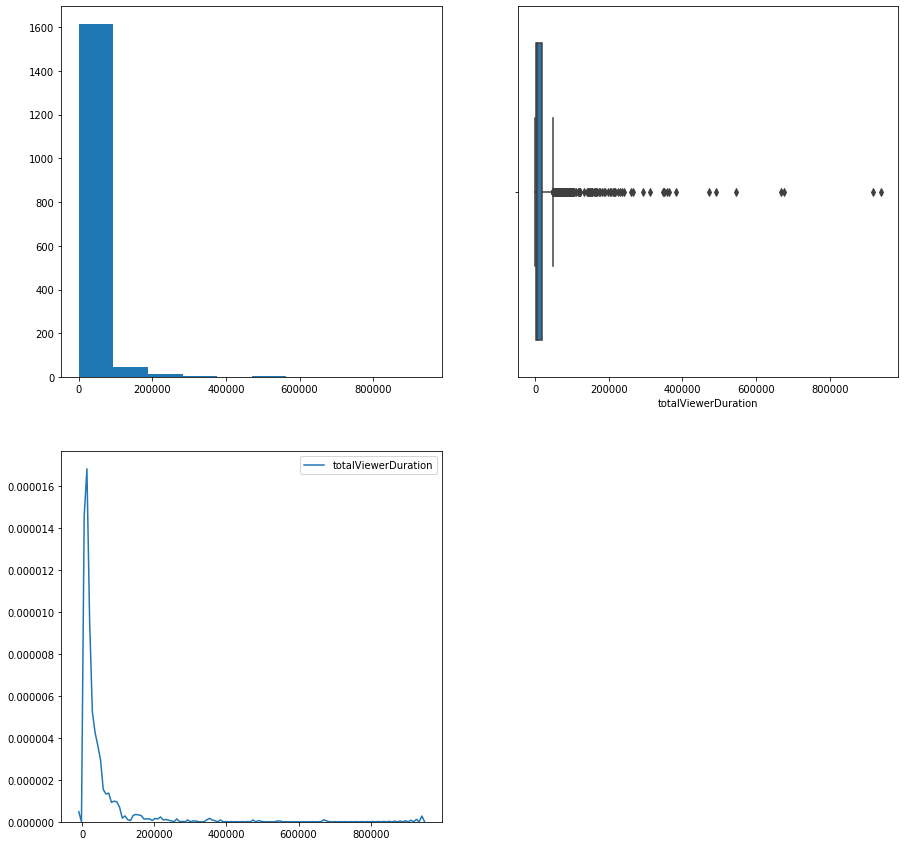

In [26]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['totalViewerDuration'])
plt.subplot(222)
sns.boxplot(df['totalViewerDuration'])
plt.subplot(223)
sns.kdeplot(df['totalViewerDuration'])
remove_nan_by_median_value(df,'totalViewerDuration')

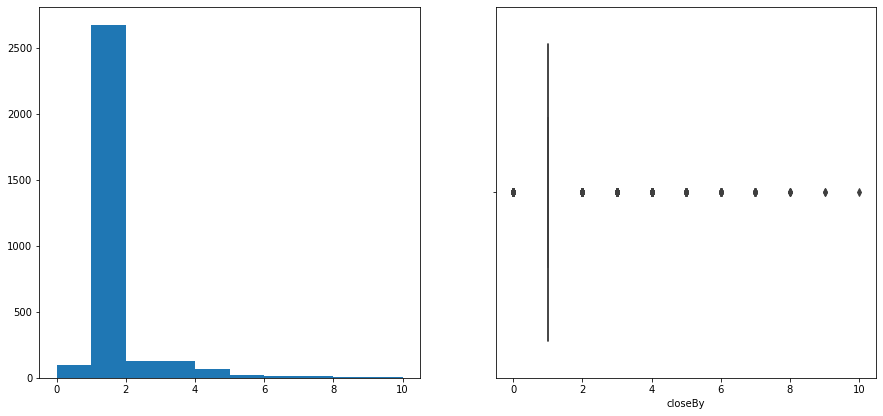

In [27]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['closeBy'])
plt.subplot(222)
sns.boxplot(df['closeBy'])

remove_nan_by_mode_value(df,'closeBy')

# Now you can see that our data doesn't contains any NAs Values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration                 3148 non-null   int64  
 1   closeBy                  3148 non-null   int64  
 2   maxLiveViewerCount       3148 non-null   int64  
 3   privateLiveStream        3148 non-null   int64  
 4   receivedLikeCount        3148 non-null   int64  
 5   streamerType             3148 non-null   int64  
 6   isShow                   3148 non-null   bool   
 7   uniqueViewerCount        3148 non-null   int64  
 8   ios                      3148 non-null   int64  
 9   android                  3148 non-null   int64  
 10  durationGTE5sec          3148 non-null   int64  
 11  durationGTE2min          3148 non-null   int64  
 12  durationGTE10min         3148 non-null   int64  
 13  totalViewerDuration      3148 non-null   float64
 14  avgViewerDuration       

# Check relation between data

In [29]:
correlations = df.corr(method='pearson')
correlations

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,Target
duration,1.000000,0.005412,0.307272,NaN,0.221690,NaN,NaN,0.440732,0.431729,0.409987,0.433552,0.424474,0.395220,0.384243,0.287408,0.223032,0.498722,0.097034,0.314782,0.423149
closeBy,0.005412,1.000000,-0.042708,NaN,-0.025516,NaN,NaN,-0.046446,-0.044215,-0.048609,-0.047038,-0.049622,-0.044657,-0.040008,-0.021250,-0.021633,-0.058161,-0.021318,-0.022613,-0.063776
maxLiveViewerCount,0.307272,-0.042708,1.000000,NaN,0.686648,NaN,NaN,0.806334,0.733755,0.803905,0.781332,0.583564,0.456965,0.481974,-0.004020,-0.046960,0.567459,0.206399,0.376570,0.467470
privateLiveStream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
receivedLikeCount,0.221690,-0.025516,0.686648,NaN,1.000000,NaN,NaN,0.732610,0.659620,0.672789,0.681670,0.523017,0.354909,0.410406,-0.007836,-0.043570,0.482471,0.201927,0.298659,0.276720
streamerType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isShow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uniqueViewerCount,0.440732,-0.046446,0.806334,NaN,0.732610,NaN,NaN,1.000000,0.958204,0.939680,0.975623,0.862327,0.743654,0.760067,0.070383,0.001996,0.830488,0.268935,0.573528,0.530659
ios,0.431729,-0.044215,0.733755,NaN,0.659620,NaN,NaN,0.958204,1.000000,0.884525,0.980800,0.915022,0.802202,0.831006,0.102099,0.023624,0.848637,0.282193,0.598978,0.509665
android,0.409987,-0.048609,0.803905,NaN,0.672789,NaN,NaN,0.939680,0.884525,1.000000,0.957211,0.800500,0.689846,0.699356,0.038351,-0.026833,0.744381,0.249412,0.490999,0.529004


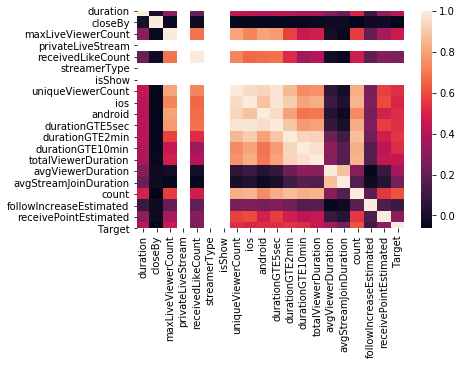

In [30]:
sns.heatmap(correlations)

# Divide data into test and train and feature scaling

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_res = df.loc[:,'duration':'receivePointEstimated']
y_res = df.iloc[:,-1].values

In [33]:
X_res.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated
0,44362,1,117,0,3447,0,False,1893,845,730,1503,493,302,919042.0,588.38,202.48,4571,-3,71937
1,18427,1,355,0,22479,0,False,2385,1639,570,2142,477,251,939946.0,426.86,133.97,5342,35,370581
2,20471,1,74,0,773,0,False,839,581,213,773,300,191,668404.0,846.08,285.40,2767,24,26551
3,14446,1,493,0,28918,0,False,1460,816,561,1333,363,178,674843.0,491.87,158.08,3301,16,29144
4,14590,1,70,0,721,0,False,674,451,189,614,254,173,544953.0,856.84,290.33,1446,17,28961


# Balance data by random over sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [36]:
X_res.shape

(5040, 19)

In [37]:
y_res.shape

(5040,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

# Data Normalization

In [39]:
from sklearn.preprocessing import Normalizer

In [40]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

# Importing Modules

# 1. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=2076,
                       verbose=0, warm_start=False)

In [43]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9880952380952381
[[494  12]
 [  0 502]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       506
           1       0.98      1.00      0.99       502

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008



# Stratified cross validation of Random forest

In [44]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_res,y_res,cv=10)

In [45]:
score.mean()

0.9825396825396826

# 99 % accuracy with Random Forest! Let's see with GaussianNB gives us better accuracy

# 2. GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
model = GaussianNB()

In [48]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9265873015873016
[[449  57]
 [ 17 485]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       506
           1       0.89      0.97      0.93       502

    accuracy                           0.93      1008
   macro avg       0.93      0.93      0.93      1008
weighted avg       0.93      0.93      0.93      1008



# 93 % accuracy with GaussianNB! Let's see with other model gives us better accuracy

# 3. Support Vector Machine

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
model = SVC()

In [51]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9067460317460317
[[446  60]
 [ 34 468]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       506
           1       0.89      0.93      0.91       502

    accuracy                           0.91      1008
   macro avg       0.91      0.91      0.91      1008
weighted avg       0.91      0.91      0.91      1008



# 91 % accuracy with Support Vector Machine! Let's see with other model gives us better accuracy

In [52]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 4. KNeighborsClassifier

In [53]:
model = neighbors.KNeighborsClassifier(3)

In [54]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9543650793650794
[[464  42]
 [  4 498]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       506
           1       0.92      0.99      0.96       502

    accuracy                           0.95      1008
   macro avg       0.96      0.95      0.95      1008
weighted avg       0.96      0.95      0.95      1008



# 95 % accuracy with KNeighborsClassifier! Let's see with other model gives us better accuracy

# 5. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8660714285714286
[[453  53]
 [ 82 420]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       506
           1       0.89      0.84      0.86       502

    accuracy                           0.87      1008
   macro avg       0.87      0.87      0.87      1008
weighted avg       0.87      0.87      0.87      1008



# 87 % accuracy with Logistic Regression! Let's see with other model gives us better accuracy

# Hence among all the models Random Forest (99 %) is the best model